In [1]:
!pip install -Uqq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


In [2]:
%pdb off

Automatic pdb calling has been turned OFF


# Connecting to google drive

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import os 
datadir = '/content/drive/My Drive/ECE421/Project work /'
os.chdir(datadir)
!pwd

/content/drive/My Drive/ECE421/Project work 


In [5]:
!ls

 Brain_EEG_Mnist_prediction.ipynb   ds35_final_report.gdoc  'trying lstm.ipynb'
 Data				    Emotions_dataset.ipynb


#Importing the Libraries



In [6]:
!pip install ipympl
print('done')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 37.0 MB/s eta 0:00:00
done


In [7]:
# import the Libraries 
import numpy as np 
import pandas as pd 
import ipympl

# importing important libraries in torch
import torch.nn as nn 
import torch
import torch.utils.data as data_library
from torchsummary import summary


#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

### Enabling the ipympl libraries' dynamic widget thing - it's something that is required in colab

In [8]:

from google.colab import output
output.enable_custom_widget_manager()

#Data description and experiment description

This is a dataset of EEG brainwave data that has been processed with author's original strategy of statistical extraction (paper below)

The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. We used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. Six minutes of resting neutral data is also recorded, the stimuli used to evoke the emotions are - 

Marley and Me - Negative (Twentieth Century Fox)
Death Scene
Up - Negative (Walt Disney Pictures)
Opening Death Scene
My Girl - Negative (Imagine Entertainment)
Funeral Scene
La La Land - Positive (Summit Entertainment)
Opening musical number
Slow Life - Positive (BioQuest Studios)
Nature timelapse
Funny Dogs - Positive (MashupZone)
Funny dog clips

#Acknowledgment of original authors 
https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface

https://www.researchgate.net/publication/335173767_A_Deep_Evolutionary_Approach_to_Bioinspired_Classifier_Optimisation_for_Brain-Machine_Interaction



#Citation of the original papers and dataset providers

J. J. Bird, L. J. Manso, E. P. Ribiero, A. Ekart, and D. R. Faria, “A study on mental state classification using eeg-based brain-machine interface,”in 9th International Conference on Intelligent Systems, IEEE, 2018.

J. J. Bird, A. Ekart, C. D. Buckingham, and D. R. Faria, “Mental emotional sentiment classification with an eeg-based brain-machine interface,” in The International Conference on Digital Image and Signal Processing (DISP’19), Springer, 2019.


#Importing data  

In [9]:
'''
We are going to import data in this cell, the data has been stored in the data/emotions.csv in the same directory.
'''
data = pd.read_csv("Data/emotions.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


In [10]:
#taking a look at the small sample of the data 
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [11]:
# looking at the mean and the
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


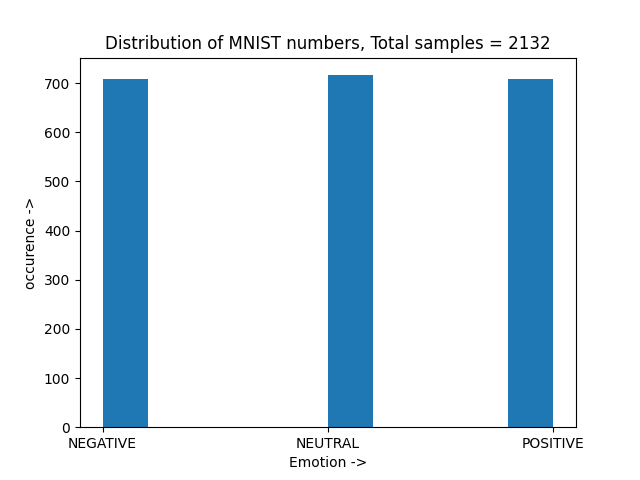

In [11]:
# show the distinct labels of emotions present in the dataset. 
A = pd.value_counts(data['label'])
#print(A)

#print(A.shape)
out_features = A.shape[0]

# make a visualization here. 
plt.figure()
plt.title('Distribution of MNIST numbers, Total samples = {}'.format(len(data)))
plt.hist(x = data['label'].values)
plt.xlabel('Emotion ->')
plt.ylabel('occurence ->')
plt.show()

# Visualizations

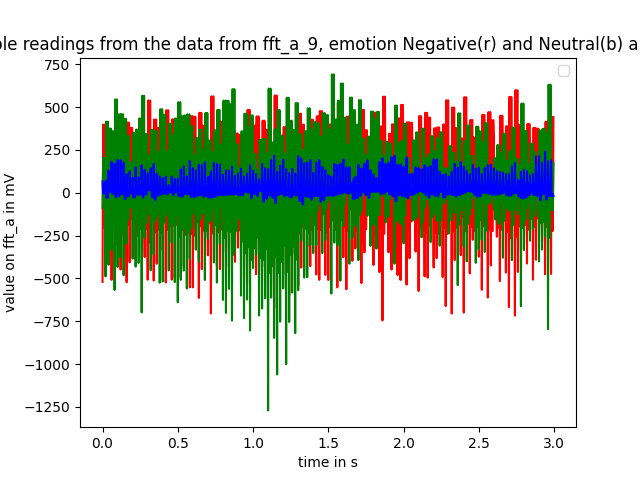

In [13]:
# plot one signal for a specific duration of time 
# we are going to plot a signal from the first row if the data, only for TP_9
TP_9_data_0 = data.loc[0, 'fft_0_a':'fft_749_a'].values
TP_9_data_1 = data.loc[1, 'fft_0_a':'fft_749_a'].values
TP_9_data_2 = data.loc[2, 'fft_0_a':'fft_749_a'].values
length = 750
fig = plt.figure()
plt.plot(np.arange(length)/250, TP_9_data_0, 'r', )

plt.plot(np.arange(length)/250 ,TP_9_data_2, 'g')
plt.plot(np.arange(length)/250 , TP_9_data_1, 'b')
plt.xlabel('time in s')
plt.title('Three sample readings from the data from fft_a_9, emotion Negative(r) and Neutral(b) and positive(c)')
plt.ylabel('value on fft_a in mV')
plt.legend()
plt.show()

In [ ]:
# plot two signal for a specific duration of time 
# we are going to plot a signal from the first and second row if the data, only for TP_10
TP_9_data_0 = data.loc[0, 'fft_0_b':'fft_749_b'].values
TP_9_data_1 = data.loc[1, 'fft_0_b':'fft_749_b'].values
TP_9_data_2 = data.loc[2, 'fft_0_b':'fft_749_b'].values
length = 750

fig = plt.figure()
plt.plot(np.arange(length)/250, TP_9_data_0, 'r', )

plt.plot(np.arange(length)/250 ,TP_9_data_2, 'g')
plt.plot(np.arange(length)/250 , TP_9_data_1, 'b')
plt.xlabel('time in s')
plt.title('Three sample readings from the data from fft_b, emotion Negative(r) and Neutral(b) and positive(c)')
plt.ylabel('value on fft_b in mV')
plt.legend()
plt.show()

In [ ]:
# plot many signals over the same graph over a specific duration of time
# todo 

# Prediction of Brain Waves

## converting to numpy arrays

In [12]:
train_data_y = data.iloc[: ,-1]
train_data = pd.concat([data.loc[:, 'fft_0_a':'fft_749_a' ] , data.loc[:, 'fft_0_b':'fft_749_b' ]] , axis = 1)
print(train_data.shape)
print(train_data_y.shape)

(2132, 1500)
(2132,)


In [13]:
y_tr = train_data_y.values
x_tr = train_data.values

## train set validation set creation

In [14]:
TEST_SIZE = 0.1


# DO NOT CHANGE
x_tr, x_te, y_tr, y_te = train_test_split(x_tr, y_tr, test_size = TEST_SIZE, shuffle=True)

In [15]:
print(x_tr[0, :10])

[162.   -14.2   -6.48  -6.48 -14.2  176.    18.4  -23.1  -23.1   18.4 ]


In [16]:
# sanity checks performed here. 
print(x_tr.shape)
print(y_tr.shape)

(1918, 1500)
(1918,)


In [17]:
# convert the labels of emotions to encoding of 0 to 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_tr = le.fit_transform(y_tr)
y_te = le.transform(y_te)

In [18]:
y_tr = y_tr.astype(int)
y_te = y_te.astype(int)

# Training Switches

### you can switch on or off any switch here depending on whether you want to train that model or not. 

In [19]:
test_models_regression = {'decision_tree_classification' : () , 'xgb_classification' : (), 'nn_classification' : (), 'cnn_classification':(), 'lstm_classification':() }


### Training of the model starts here

####Decision Tree

Include 'decision_tree_classification' in the test_models_regression dict to switch on the training




decision tree regression results ::

best Parameteres:  {'max_depth': 2}
train : 0.5823134836116878
test : 0.6224578357655326


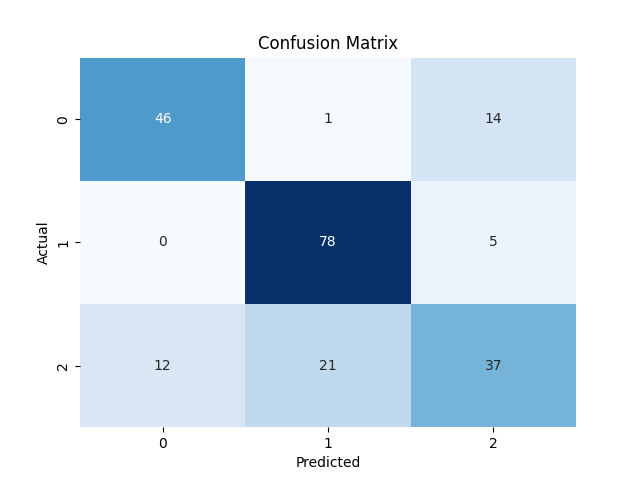

[[46  1 14]
 [ 0 78  5]
 [12 21 37]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        61
           1       0.78      0.94      0.85        83
           2       0.66      0.53      0.59        70

    accuracy                           0.75       214
   macro avg       0.74      0.74      0.74       214
weighted avg       0.74      0.75      0.74       214



In [53]:
# Decision tree training here if the switch of Decision Tree is Set to on. 'decision_tree_classification' to switch on.
  
if "decision_tree_classification" in test_models_regression : 
    from sklearn.tree import DecisionTreeClassifier
    
    SS = StandardScaler()
    x_tr_st = SS.fit_transform(x_tr)
    x_te_st = SS.transform(x_te)
    
    print('\n\n\ndecision tree regression results ::\n')
    tune_param = {
        'max_depth' : (1,2)
    }
    linr = GridSearchCV( DecisionTreeClassifier(), tune_param )
    linr.fit(x_tr_st, y_tr)
    #print('Best Parameters results :' , clf.cv_results_)
    print('best Parameteres: ' , linr.best_params_)
    
    
    y_p_tr = linr.predict_proba(x_tr_st)
    y_p_te = linr.predict_proba(x_te_st)
    
    from sklearn.metrics import log_loss
    print('train :' ,log_loss(y_tr, y_p_tr))
    print('test :' ,log_loss( y_te , y_p_te))
    
    cm = confusion_matrix(y_te , y_p_te.argmax(axis =1) )
    plt.figure()
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print(cm)
    print(classification_report(y_te, y_p_te.argmax(axis =1) ))
    #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
    
    test_models_regression['decision_tree_classification'] = (linr , 1,  log_loss(y_te, y_p_te))


XGBoost Training here. Include 'xgb_classification' to switch on. 






 xgb regreassion results ::

best Parameteres:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5}
train : 0.6773989189996487
test : 0.7329900545635063


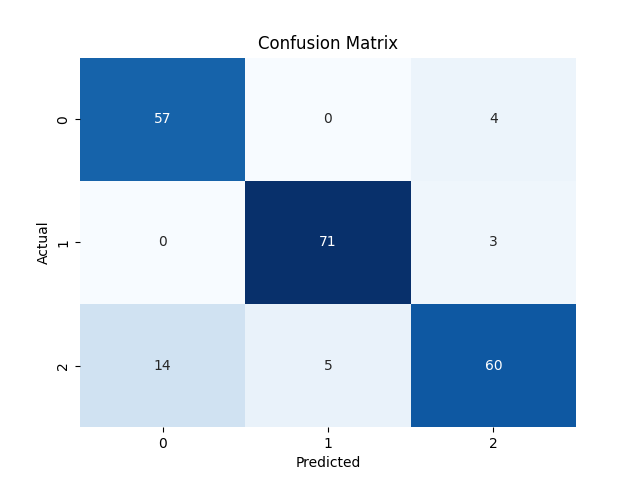

[[57  0  4]
 [ 0 71  3]
 [14  5 60]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        61
           1       0.93      0.96      0.95        74
           2       0.90      0.76      0.82        79

    accuracy                           0.88       214
   macro avg       0.88      0.88      0.88       214
weighted avg       0.88      0.88      0.88       214



In [46]:

if 'xgb_classification' in test_models_regression : 
    from xgboost import XGBClassifier
    linr = XGBClassifier()
    SS = StandardScaler()
    x_tr_st = SS.fit_transform(x_tr)
    x_te_st = SS.transform(x_te)
    
    print('\n\n')
    print( '\n\n xgb regreassion results ::\n')
    tune_param = {
        'max_depth': [3, 4, 5],
        'n_estimators' : [5],
        'learning_rate': [0.001, 0.01 , 0.1]
    }
    linr = GridSearchCV( XGBClassifier(), tune_param )
    linr.fit(x_tr_st, y_tr)
    #print('Best Parameters results :' , clf.cv_results_)
    print('best Parameteres: ' , linr.best_params_)
    
    y_p_tr = linr.predict_proba(x_tr_st)
    y_p_te = linr.predict_proba(x_te_st)
    
    print('train :' ,log_loss(y_tr , y_p_tr ))
    print('test :' ,log_loss(y_te , y_p_te))
    
    cm = confusion_matrix(y_te , y_p_te.argmax(axis =1)  )
    plt.figure()
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print(cm)
    print(classification_report(y_te, y_p_te.argmax(axis =1) ))
    #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
    
    test_models_regression['xgb_classification'] = (linr , 1,  log_loss(y_te, y_p_te))




#### Neural Network training here. 

Include 'nn_classification' in the test_regression_model to switch on. 

torch.Size([1918, 1500])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         384,256
         LeakyReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
              ReLU-4                  [-1, 128]               0
            Linear-5                  [-1, 128]          16,512
              ReLU-6                  [-1, 128]               0
            Linear-7                   [-1, 64]           8,256
              ReLU-8                   [-1, 64]               0
            Linear-9                    [-1, 3]             195
          Softmax-10                    [-1, 3]               0
Total params: 442,115
Trainable params: 442,115
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params si

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 Epoch :: 10 , test loss :: 0.6514136791229248 , train_loss :: 0.6252432465553284
 Epoch :: 20 , test loss :: 0.6112163066864014 , train_loss :: 0.5891563892364502
 Epoch :: 30 , test loss :: 0.6028514504432678 , train_loss :: 0.5777732729911804
 Epoch :: 40 , test loss :: 0.6003360152244568 , train_loss :: 0.5732903480529785
 Epoch :: 50 , test loss :: 0.5938684344291687 , train_loss :: 0.5692204833030701
 Epoch :: 60 , test loss :: 0.5927318930625916 , train_loss :: 0.5670134425163269
 Epoch :: 70 , test loss :: 0.5907564759254456 , train_loss :: 0.5660898089408875
 Epoch :: 80 , test loss :: 0.5892032384872437 , train_loss :: 0.5653448104858398
 Epoch :: 90 , test loss :: 0.5882596373558044 , train_loss :: 0.5648151636123657
 Epoch :: 100 , test loss :: 0.5867745876312256 , train_loss :: 0.5643672943115234
 Epoch :: 110 , test loss :: 0.5850640535354614 , train_loss :: 0.5637981295585632
 Epoch :: 120 , test loss :: 0.5846582651138306 , train_loss :: 0.5636138319969177
 Epoch :: 130

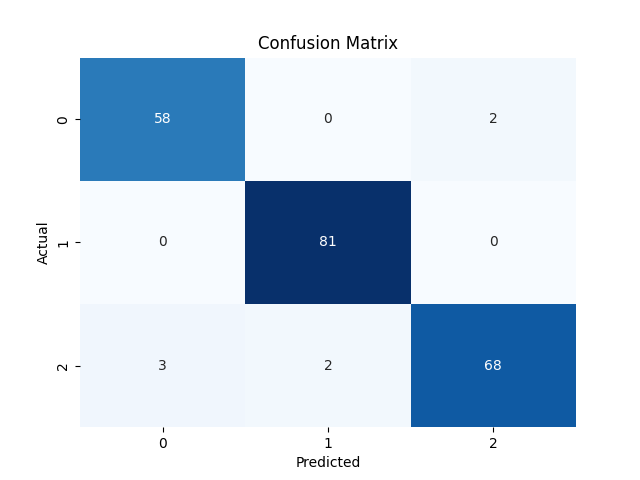

[[58  0  2]
 [ 0 81  0]
 [ 3  2 68]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        61
           1       1.00      0.98      0.99        83
           2       0.93      0.97      0.95        70

    accuracy                           0.97       214
   macro avg       0.97      0.97      0.97       214
weighted avg       0.97      0.97      0.97       214



In [22]:
if 'nn_classification' in test_models_regression : 
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  x_tr_T = torch.tensor(x_tr , dtype=torch.float32).to(device)
  x_te_T = torch.tensor(x_te, dtype=torch.float32).to(device)
  y_tr_T = torch.tensor(y_tr).type(torch.LongTensor).to(device)
  y_te_T = torch.tensor(y_te).type(torch.LongTensor).to(device)
  print(x_tr_T.shape)
  model = nn.Sequential(
      nn.Linear(x_tr.shape[1], 256),
      nn.LeakyReLU(0.1),  
      nn.Linear(256, 128), 
      nn.ReLU(), 
      nn.Linear(128, 128), 
      nn.ReLU(), 
      nn.Linear(128, 64), 
      nn.ReLU(), 
      nn.Linear(64, out_features),
      nn.Softmax()
  )

  model.to(device)
  print(summary(model, (1500,)))
  optim = torch.optim.Adam( model.parameters() , lr = 1e-5)
  loss_criterion = nn.CrossEntropyLoss()
  loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tr_T, y_tr_T) , shuffle=True , batch_size = 128)

  no_epochs = 200
  N = x_tr_T.size(0)
  for epoch in range(no_epochs):
    model.train()
    for x_b, y_b in loader:
      y_pred = model(x_b)
      loss = loss_criterion(y_pred , y_b)
      optim.zero_grad()
      loss.backward()
      optim.step()
    
    if epoch%10 != 0 : 
      continue
    # test on the test data.
    model.eval()
    y_p_tr = model(x_tr_T)
    y_p_te = model(x_te_T)
    print(' Epoch :: {} , test loss :: {} , train_loss :: {}'.format(epoch, loss_criterion(y_p_te, y_te_T).detach().item() ,loss_criterion(y_p_tr, y_tr_T).detach().item() ) )

  model.eval()
  y_p_tr = model(x_tr_T).detach()
  y_p_te = model(x_te_T).detach()
  
  print('train :' ,loss_criterion(y_p_tr , y_tr_T))
  print('test :' ,loss_criterion(y_p_te,  y_te_T))
  
  cm = confusion_matrix(y_p_te.to('cpu').numpy().argmax(axis = 1) , y_te )
  plt.figure()
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  #print('model score : ', model.score(x_te, y_te))
  from sklearn.metrics import r2_score, confusion_matrix, f1_score
  print(cm)
  print(classification_report(y_te, y_p_te.to('cpu').numpy().argmax(axis = 1) ))
  #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
  test_models_regression['nn_classification'] = (model , 1,  loss_criterion(y_p_te,  y_te_T) )


#### CNN training here. 

Include 'cnn_classification' to switch on. 

In [ ]:
# this cell is to empty some cuda memory
import gc

gc.collect()
torch.cuda.empty_cache()

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 1, 748]             128
         LeakyReLU-2           [-1, 32, 1, 748]               0
            Conv2d-3            [-1, 4, 1, 746]             388
         LeakyReLU-4            [-1, 4, 1, 746]               0
            Conv2d-5            [-1, 1, 1, 744]              13
         LeakyReLU-6            [-1, 1, 1, 744]               0
           Flatten-7                  [-1, 744]               0
            Linear-8                   [-1, 32]          23,840
              ReLU-9                   [-1, 32]               0
           Linear-10                    [-1, 3]              99
          Softmax-11                    [-1, 3]               0
Total params: 24,468
Trainable params: 24,468
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

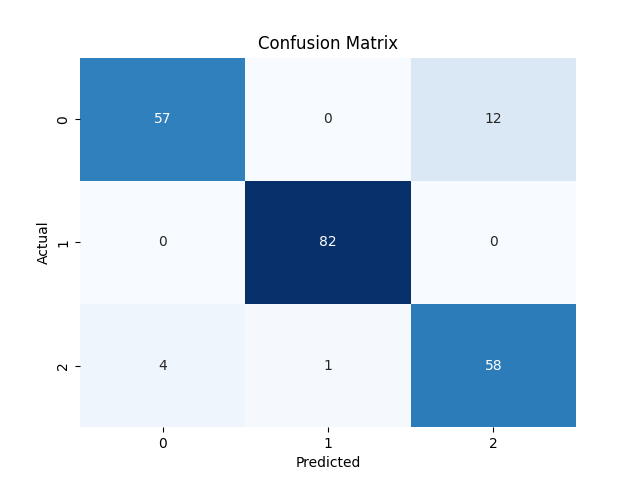

[[57  0 12]
 [ 0 82  0]
 [ 4  1 58]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        61
           1       1.00      0.99      0.99        83
           2       0.92      0.83      0.87        70

    accuracy                           0.92       214
   macro avg       0.92      0.92      0.91       214
weighted avg       0.92      0.92      0.92       214



In [27]:

if 'cnn_classification' in test_models_regression: 
  # make gpu copies of the data. train test , labels etx. 
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  x_tr_T = torch.tensor(x_tr , dtype=torch.float32).to(device)
  x_te_T = torch.tensor(x_te, dtype=torch.float32).to(device)
  y_tr_T = torch.tensor(y_tr).type(torch.LongTensor).to(device)
  y_te_T = torch.tensor(y_te).type(torch.LongTensor).to(device)

  # transform the train nad the test imputs to look like an image of size N*2*512
  N = x_tr_T.size(0)
  x_tr_T  = torch.reshape(x_tr_T, (N, 1, 2, 750))
  N_t = x_te_T.size(0)
  x_te_T  = torch.reshape(x_te_T, (N_t, 1, 2, 750))
  # this will make them look like images and then convolutions can be performed on them 

  # declare a model that takes a 2 * 512 image as an input , and then add a few layer of cnn
  #convert to Fully connected layers and then return a softmax array of size (10,1), argmax is the solution. 
  model = nn.Sequential(
      nn.Conv2d(1, 32, (1,3) , (2,1) ),
      nn.LeakyReLU(0.1), 
      nn.Conv2d(32, 4, (1,3), (2,1)),
      nn.LeakyReLU(0.1),
      nn.Conv2d(4, 1, (1,3), (2,1)),
      nn.LeakyReLU(0.1),
      

      # what comes out here is a some 2d array of inputs, I need to flatten it.
      nn.Flatten(),
      nn.Linear(744, 32), 
      nn.ReLU(),
      nn.Linear(32, out_features),
      nn.Softmax()
  )
  
  model = model.to(device)
  print(summary(model, ( 1, 2, 750)))

  # declare the optim, no_epochs, loss_criterion
  #run the training loop
  # in : declare the batch_size 
  # in : find the number of batches, make a rand index array that sample the inputs from the input arrays. 
  # in : run the batch loop 
  # in : in :  pass the batch throught the model
  # in : in : pass the otuput through loss criterin 
  # in : in : backward the loss 
  # in : in  : zero the grad and step the optimizer to update the weights 
  # loop over 

  optim = torch.optim.Adam( model.parameters() , lr = 1e-4)
  loss_criterion = nn.CrossEntropyLoss()

  no_epochs = 300
  N = x_tr_T.size(0)
  for epoch in range(no_epochs):
    batch_size = 256
    number_batch = N // batch_size
    model.train()
    for batch in range(number_batch):
      batch_ind = torch.randint(low = 0, high = N, size = (batch_size,)).to(device) # change this 
      y_pred = model(x_tr_T[batch_ind])
      loss = loss_criterion(y_pred, y_tr_T[batch_ind])
      #print('train loss :: ' , loss.detach().item())
      optim.zero_grad()
      loss.backward()
      optim.step()
    
    # test on the test data.
    if epoch%10 != 0 : 
        continue
    model.eval()
    
    #ipdb.set_trace()
    y_p_tr = model(x_tr_T)
    y_p_te = model(x_te_T)
    print(' Epoch :: {} , test loss :: {} , train_loss :: {}'.format(epoch, loss_criterion(y_p_te, y_te_T).detach().item() ,loss_criterion(y_p_tr, y_tr_T).detach().item() ) )

  # now we have our trained model , we can use it to predict the brain signal
  # predict the brain signals on training and testing dataset
  model.eval()
  y_p_tr = model(x_tr_T).detach()
  y_p_te = model(x_te_T).detach()
  
  # show the outputs as always. 
  print('train :' ,loss_criterion(y_p_tr , y_tr_T))
  print('test :' ,loss_criterion(y_p_te,  y_te_T))
  cm = confusion_matrix(y_p_te.to('cpu').numpy().argmax(axis = 1) , y_te )
  plt.figure()
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  #print('model score : ', model.score(x_te, y_te))
  from sklearn.metrics import r2_score, confusion_matrix, f1_score
  print(cm)
  print(classification_report(y_te, y_p_te.to('cpu').numpy().argmax(axis = 1) ))
  
  test_models_regression['cnn_classification'] = (model , 1,  loss_criterion(y_p_te,  y_te_T) )



<ipython-input-32-835581c4d5e1>:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.linear(x))


Epoch :: 0  test_loss :: 1.098606824874878 , train_loss :: 1.0986117124557495
Epoch :: 20  test_loss :: 1.094624638557434 , train_loss :: 1.098144769668579
Epoch :: 40  test_loss :: 1.090859293937683 , train_loss :: 1.0977362394332886
Epoch :: 60  test_loss :: 1.0903457403182983 , train_loss :: 1.0976728200912476
Epoch :: 80  test_loss :: 1.0909444093704224 , train_loss :: 1.097771167755127
Epoch :: 100  test_loss :: 1.0900355577468872 , train_loss :: 1.0976420640945435
Epoch :: 120  test_loss :: 1.0900537967681885 , train_loss :: 1.0976378917694092
Epoch :: 140  test_loss :: 1.090186595916748 , train_loss :: 1.097659707069397
Epoch :: 160  test_loss :: 1.0903151035308838 , train_loss :: 1.0976927280426025
Epoch :: 180  test_loss :: 1.0901870727539062 , train_loss :: 1.0976550579071045
Epoch :: 200  test_loss :: 1.090079665184021 , train_loss :: 1.0976439714431763
Epoch :: 220  test_loss :: 1.0902214050292969 , train_loss :: 1.097635269165039
Epoch :: 240  test_loss :: 1.09002065658569

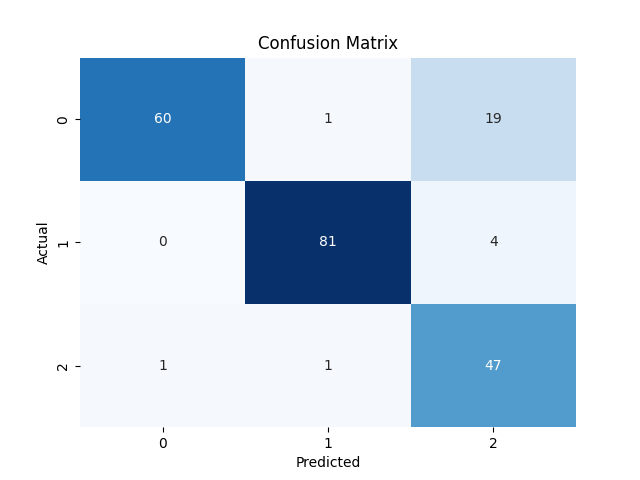

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        61
           1       0.95      0.98      0.96        83
           2       0.96      0.67      0.79        70

    accuracy                           0.88       214
   macro avg       0.89      0.88      0.87       214
weighted avg       0.90      0.88      0.87       214



In [32]:


if 'lstm_classification' in test_models_regression:
  # what we have here - x_train , y_train, x_test, y_test. 
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  x_tr_T = torch.tensor(x_tr , dtype=torch.float32).to(device)
  x_te_T = torch.tensor(x_te, dtype=torch.float32).to(device)
  y_tr_T = torch.tensor(y_tr).type(torch.LongTensor).to(device)
  y_te_T = torch.tensor(y_te).type(torch.LongTensor).to(device)
  batch_size = 750 # this is not actural batch size, but according to the terminology of LSTM , this is 
  input_size = 2

  x_tr_t = torch.zeros((x_tr_T.size(0) , batch_size, input_size)).to(device)
  for i in range(x_tr_T.size(0)): 
    x_tr_t[i] = x_tr_T[i].view(2, batch_size).t()
  
  x_te_t = torch.zeros((x_te_T.size(0) , batch_size, input_size)).to(device)
  for i in range(x_te_T.size(0)): 
    x_te_t[i] = x_te_T[i].view(2, batch_size).t()
  
  y_tr_t = torch.zeros((x_tr_T.size(0) , batch_size, 1)).type(torch.LongTensor).to(device)
  for i in range(y_tr_T.size(0)): 
    y_tr_t[i] = y_tr_T[i] * torch.ones((batch_size, 1)).to(device)
  
  y_te_t = torch.zeros((x_te_T.size(0) , batch_size, 1)).type(torch.LongTensor).to(device)
  for i in range(y_te_T.size(0)): 
    y_te_t[i] = y_te_T[i] * torch.ones((batch_size, 1)).to(device)

  class EEGMnistClassifier(nn.Module):
    def __init__(self):
      super().__init__()
      self.lstm = nn.LSTM(input_size = 2, hidden_size = 32, num_layers = 4, batch_first = True)
      self.linear = nn.Linear(32, out_features)
      self.softmax = nn.Softmax()
    
    def forward(self, x): 
      x, _ = self.lstm(x)
      x = self.softmax(self.linear(x))
      return x
  

  loss_criterion = nn.CrossEntropyLoss()
  EEGModel = EEGMnistClassifier().to(device)
  opti = torch.optim.Adam(EEGModel.parameters(), lr = 1e-4)

  
  #print(summary(EEGModel, (750,2) ) )

  loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tr_t, y_tr_t) , shuffle = True, batch_size = 128)
  
  n_epochs = 400
  for i in range(n_epochs): 
    EEGModel.train()
    for x_b , y_b in loader : 
      #ipdb.set_trace()
      y_pred = EEGModel(x_b)
      #ipdb.set_trace()
      loss = loss_criterion( y_pred.view(-1,out_features), y_b.view(-1) )
      opti.zero_grad()
      loss.backward()
      #if i%10 == 5 : print('train loss :: {}'.format(loss.detach().item()))
      opti.step()

    # validation 
    if i%20 != 0:
      continue
    
    EEGModel.eval()
    with torch.no_grad(): 
      y_p_tr = EEGModel(x_tr_t)
      y_pred = EEGModel(x_te_t)
      #ipdb.set_trace()
      loss_test = loss_criterion(y_pred[:, -1, :].view(-1,out_features), y_te_t[:, -1, :].view(-1))
      loss_train = loss_criterion(y_p_tr[:, -1, :].view(-1,out_features), y_tr_t[:, -1, :].view(-1))
      print('Epoch :: {}  test_loss :: {} , train_loss :: {}'.format(i, loss_test.detach().item() , loss_train.detach().item() ))
  
  EEGModel.eval()
  y_p_tr = EEGModel(x_tr_t)[:, -1, :].view(-1,out_features).detach()
  y_p_te = EEGModel(x_te_t)[:, -1, :].view(-1,out_features).detach()
  
  # show the outputs as always. 
  print('train :' ,loss_criterion(y_p_tr , y_tr_t[:, -1, :].view(-1)))
  print('test :' ,loss_criterion(y_p_te,  y_te_t[:, -1, :].view(-1)))

  #confusion matrix
  cm = confusion_matrix(y_p_te.to('cpu').numpy().argmax(axis = 1) , y_te )
  plt.figure()
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print(classification_report(y_te, y_p_te.to('cpu').numpy().argmax(axis = 1) ))
  #print('model score : ', model.score(x_te, y_te))
  from sklearn.metrics import r2_score, confusion_matrix, f1_score
  test_models_regression['lstm_classification'] = (EEGModel , 1, loss_criterion(y_p_te,  y_te_t[:, -1, :].view(-1))  )


In [51]:
# display the decision trees here. 
test_models_regression['decision_tree_classification'][0].best_estimator_

DecisionTreeClassifier(max_depth=3)

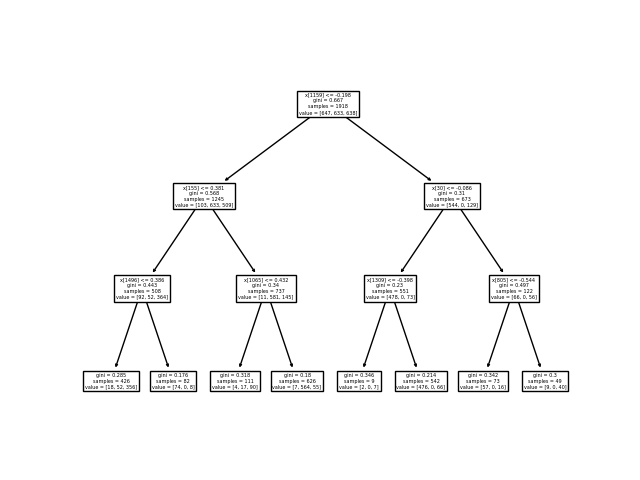

In [52]:
from sklearn import tree
plt.figure()
tree.plot_tree(test_models_regression['decision_tree_classification'][0].best_estimator_)
plt.show()

<ipython-input-55-5f9b9663610c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


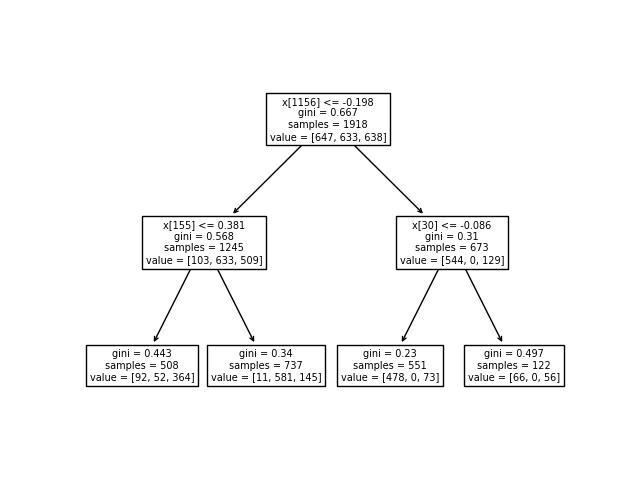

0.7471320169712794


In [55]:
from sklearn import tree
plt.figure()
tree.plot_tree(test_models_regression['decision_tree_classification'][0].best_estimator_)
plt.show()

# printing the performance 
print(test_models_regression['decision_tree_classification'][0].best_score_)